<a href="https://colab.research.google.com/github/peppievt/Gated-training/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
#from matplotlib import style
import heapq

import librosa
import librosa.display
import IPython.display as ipd
import keras

from numpy import dot
from numpy.linalg import norm
from google.colab import drive

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import LSTM, Embedding
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization

from keras.utils import np_utils, to_categorical
import pickle
from keras.layers import TimeDistributed

from sklearn.preprocessing import MinMaxScaler
import scipy
import scipy.sparse as sparse
import random
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
import json

In [ ]:
adres = r'/content/gdrive/My Drive/Colab Notebooks/data/'
learning_Rate = 0.002
#plt.style.use('dark_background')
#plt.style.use('classic')
options = ['real_compound']
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#lengte = output dimensie
lengte = 2260
ones = 1
half_gates = False
if half_gates:
    save_dir = os.path.join('/content/gdrive/My Drive/Colab Notebooks/data', 'saved_models/(2500,1)_model_LSTM_12-2_250_half_gates_normalized')
else:
    save_dir = os.path.join('/content/gdrive/My Drive/Colab Notebooks/data', 'saved_models/(2500,1)_model_LSTM_12-2_150_fullgates_normalized')
# fig plot specs:

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def model_LSTM():
    model = Sequential()
    model.add(LSTM(512, input_shape=(None,len(X_train[0]))))
    model.add(Dense(len(y_train[0]))) 
    model.add(Activation('softmax'))
    model.summary()
    return model

def load_info():
    X_train = np.load(save_dir + '/X_train.npy', allow_pickle=True)
    y_train = np.load(save_dir + '/y_train.npy', allow_pickle=True)
    X_val = np.load(save_dir + '/X_val.npy', allow_pickle=True)
    y_val = np.load(save_dir + '/y_val.npy', allow_pickle=True)
    X_test = np.load(save_dir + '/X_test.npy', allow_pickle=True)
    y_test = np.load(save_dir + '/y_test.npy', allow_pickle=True)
    file_to_read = open(save_dir + '/dict.p', 'rb')
    this_dict = pickle.load(file_to_read)
    return X_train, y_train, X_val, y_val, X_test, y_test, this_dict

def fix_df(dictionary):
    for key in dictionary:
        dictionary[key] = dictionary[key]/ones
    return dictionary

#variable meegeven voor elke '500':
def show_training_curves():
    model_acc, model_loss, val_acc, val_loss = [],[],[],[]
    adres = save_dir + '/'
    if half_gates:
        x = 250
    else:
        x = 150
    model_acc.extend(np.load(adres + 'model_acc_' + str(x) + '.npy'))
    model_loss.extend(np.load(adres + 'model_loss_' + str(x) + '.npy'))
    val_acc.extend(np.load(adres + 'model_val_acc_' + str(x) + '.npy'))
    val_loss.extend(np.load(adres + 'model_val_loss_' + str(x) + '.npy'))
    print("training acc: ",model_acc[-1])
    print("training loss: ", model_loss[-1])
    print("validatie acc: ",val_acc[-1])
    print("validatie loss: ",val_loss[-1])

    plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

    plt.subplot(2, 1, 1)
    plt.plot(np.array(model_acc).flatten(), label = 'Training accuracy', color = 'red')
    plt.plot(np.array(val_acc).flatten(), label = 'Validation accuracy', color ='blue')
    plt.xlabel('Number of epochs')
    plt.ylabel('Training Accuracy')
    plt.title('Accuracy during training')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(np.array(model_loss).flatten(), label = 'Training loss', color='red')
    plt.plot(np.array(val_loss).flatten(), label = 'Validation loss', color = 'blue')
    plt.xlabel('Number of epochs')
    plt.ylabel('Cosine similarity Loss')
    plt.title('Loss during training')
    plt.grid(True)
    plt.legend()
    plt.savefig(save_dir + '/training figure')
    plt.tight_layout()
    plt.show()

def fix_test_set(X_test, y_test):
    X_test = X_test[int(0.5*len(X_test)):]
    y_test = y_test[int(0.5*len(y_test)):]
    X_test = [x.T for x in X_test]
    print(len(X_test))
    return X_test, y_test

In [ ]:
df_features = pd.read_pickle(adres + 'Baldey_features/real_2_specto_baldey.pkl')
df_names = pd.read_pickle(adres + 'Baldey_features/real_2_specto_baldey_names.pkl')
model = tf.keras.models.load_model(save_dir)
X_train, y_train, X_val, y_val, X_test, y_test, dictionary = load_info()

In [ ]:
X_test, y_test = fix_test_set(X_test, y_test)

2260


In [ ]:
'''save_dir = os.path.join('/content/gdrive/My Drive/Colab Notebooks/data', 'saved_models/(2500,1)_model_LSTM_12-2_150_fullgates_normalized')
X_test2 = np.load(save_dir + '/X_test.npy', allow_pickle=True)
y_test2 = np.load(save_dir + '/y_test.npy', allow_pickle=True)
X_test2, y_test2 = fix_test_set(X_test2, y_test2)
'''

"save_dir = os.path.join('/content/gdrive/My Drive/Colab Notebooks/data', 'saved_models/(2500,1)_model_LSTM_12-2_150_fullgates_normalized')\nX_test2 = np.load(save_dir + '/X_test.npy', allow_pickle=True)\ny_test2 = np.load(save_dir + '/y_test.npy', allow_pickle=True)\nX_test2, y_test2 = fix_test_set(X_test2, y_test2)\n"

In [ ]:
dictionary = fix_df(dictionary)

training acc:  1.0
training loss:  -0.9697433114051819
validatie acc:  1.0
validatie loss:  -0.9702849388122559


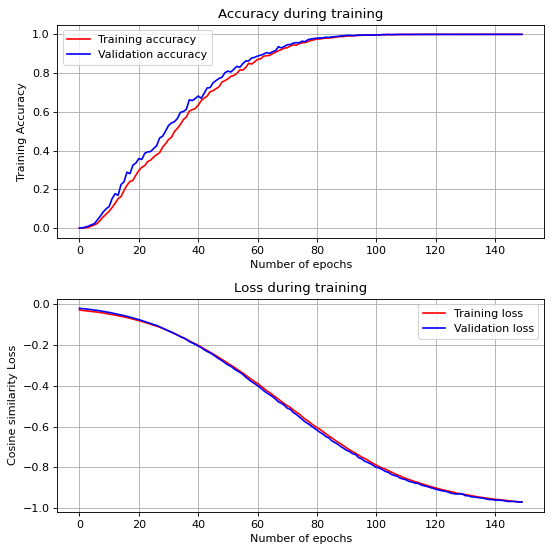

In [ ]:
show_training_curves()

In [ ]:
print(X_train[0].shape)

(68, 128)


In [ ]:
#returns the Maximum N closest vectors from a cosine_sim list (x).
def max_N(cos_sim_lijst, n, y_train):
    max_list, argmax_list, names = [], [], []
    res = sorted(range(len(cos_sim_lijst)), key = lambda sub: cos_sim_lijst[sub])[-n:] 
    for i in range(1,n+1):
        names.append(return_name(y_train[res[n-i]], dictionary))
        max_list.append(cos_sim_lijst[res[n-i]])
    return max_list, names, res   

def cosine_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

def cosine_sim_list(a, b):
    lijst = [cosine_sim(a,x) for x in b]
    return lijst

def return_name(label, dictionary):
    x = []
    for key in dictionary:
        if np.array_equal(dictionary[key],label):
            x = key
    return x

def return_spot_from_name(name, dictionary, y_train):
    for i in range(len(y_train)):
        if (return_name(y_train[i], dictionary) == name):
            return i
            

#predicts class op #timesteps:
# returns cosine similarity with target (i_true) and predictions
def gating(i, i_true, X_train, y_train):
    #sample = np.expand_dims(sample, axis=0)
    lengte = len(X_train[i])
    time_steps = range(1,lengte,1)
    samp = X_train[i]
    sampl2 = samp[:lengte,:]
    sampl2 = np.expand_dims(samp, axis=0)
    predictions = []
    for j in time_steps:
        timesample = sampl2[:, 0:j, :]
        #timesample = timesample.reshape(1,tijd, 128)
        preds = model.predict(timesample, verbose=0)
        predictions.append(cosine_sim(preds, y_train[i_true]))
        if j >= 40 and j <= 50:
            x = cosine_sim(preds, y_train[i_true])
            #print(x[0])
    return predictions, preds

def prediction_on_time(i, tijdsstap, competitors, X_train, y_train):
    assert len(X_train[i]) >= tijdsstap
    print("lengte woord: ", return_name(y_train[i], dictionary), len(X_train[i]))
    samp = X_train[i]
    samp = samp[:tijdsstap,:]
    samp = np.expand_dims(samp, axis=0)
    preds = model.predict(samp, verbose=0)
    cos_lijst = cosine_sim_list(preds, y_train[0:2260])
    cos_lijst = list(cos_lijst)
    print("max ", heapq.nlargest(competitors,cos_lijst))
    perc, word, res = max_N(cos_lijst,competitors, y_train[0:2260])
    print("woord: ", return_name(y_train[i], dictionary))
    print("res is: ", res)
    print("woorden", word)
    print("similarity with target: ", cosine_sim(preds, y_train[i]))
    for i in range(len(word)):
        if word[i] == 'bekers':
            print(i, word[i])
    plt.xlabel("Label position")
    plt.ylabel("Vector activation")
    plt.title("Fuzzy Word prediction vector")
    plt.plot(preds.flatten())
    plt.legend()
    plt.grid(True)
    

In [ ]:
for i in range(len(X_train)):
    if len(X_train[i]) < 40:
        print(i, return_name(y_train[i], dictionary), len(X_train[i]))

105 enger 36
190 holler 37
724 tobber 36
726 temmer 35
1167 dieven 38
1171 duimen 39
1176 effen 37
1184 dimmen 36
1196 enge 31
1201 dam 37
1208 engelen 39
1355 hoeden 35
1365 hik 38
1367 heien 39
1381 hen 35
1383 hang 33
1392 jen 29
1394 kabbel 38
1396 ijl 32
1401 hor 23
1403 kade 36
1405 innen 29
1411 kannen 28
1422 hol 34
1427 jute 39
1430 kieper 39
1453 katten 33
1464 klom 36
1466 knip 39
1470 kibbel 32
1473 kiem 27
1483 kwallen 36
1487 krom 39
1492 kuub 36
1499 kom 29
1502 kopie 38
1517 koffie 35
1521 lila 39
1543 lekker 39
1567 nasi 39
1573 mie 27
1576 moe 23
1607 mokken 36
1622 ossen 39
1625 peilen 38
1628 pellen 30
1631 open 37
1636 oorden 38
1658 pij 33
1664 plan 36
1667 porde 37
1674 porie 39
1677 ploeter 39
1679 poef 39
1684 pollen 34
1686 pin 28
1695 rammel 39
1716 puien 37
1717 redden 37
1728 pup 31
1746 riemen 37
1952 tip 34
1956 tik 36
1960 toepen 35
1963 torren 31
1965 tooi 35
1966 tour 39
1968 tel 33
1971 thee 33
1973 tenger 36
1979 timen 37
1980 tonnen 33
1987 tij 37
1

73
hoffelijk


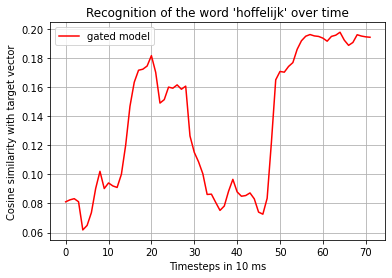

In [ ]:
#for testing: 
#241 for 'gracht'.
#1956 for 'bekers'
#955 weeg
#976 wee
i=190
print(len(X_val[i]))
print(return_name(y_val[i], dictionary))
preds ,_ = gating(i, i, X_val, y_val)

plt.plot(preds, color='red', label = 'gated model')
#plt.plot(Fals, color='blue', label = 'full-gated model')
plt.grid(True)
plt.xlabel("Timesteps in 10 ms")
plt.ylabel("Cosine similarity with target vector")
plt.title("Recognition of the word 'hoffelijk' over time")
plt.legend()

In [ ]:
print("maximum prediction: ", np.argmax(preds))
print(np.max(preds))

maximum prediction:  64
0.1976406323369973


In [ ]:
i=190
prediction_on_time(i, 37, 20, X_val, y_val)
#prediction_on_time(i, 39, 20, X_train, y_train)
print(return_name(y_train[i], dictionary))
#prediction_on_time(i, 38, 20, X_test, y_test)
#prediction_on_time(i, 39, 20, X_test, y_test)
#prediction_on_time(i, 40, 20, X_test, y_test)

No handles with labels found to put in legend.


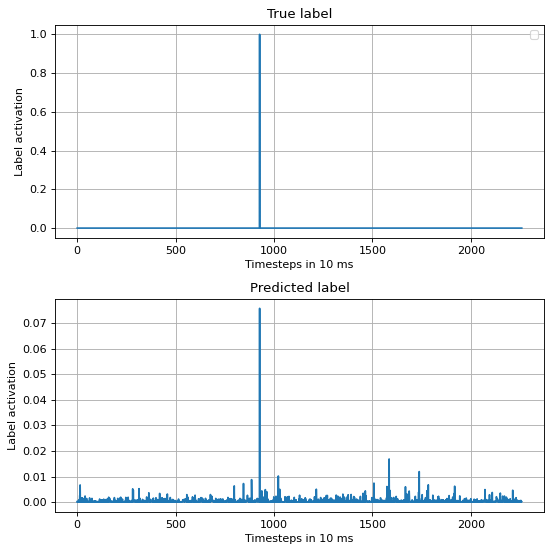

dwingerig


In [ ]:
i = 2
sample = np.expand_dims(X_test[i], axis=0)
preds = model.predict(sample, verbose=0)

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 1, 1)
plt.plot(y_test[i])
plt.xlabel("Timesteps in 10 ms")
plt.ylabel("Label activation")
plt.title('True label')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(preds.flatten())
plt.xlabel("Timesteps in 10 ms")
plt.ylabel("Label activation")
plt.title('Predicted label')
plt.grid(True)
#plt.savefig(save_dir + '/training figure')
plt.tight_layout()
plt.show()


#axs[2].plot(y_val[2200], label = 'nr2')
#axs[3].plot(y_val[100], label = 'nr3')
print(return_name(y_test[i], dictionary))

dwingerig


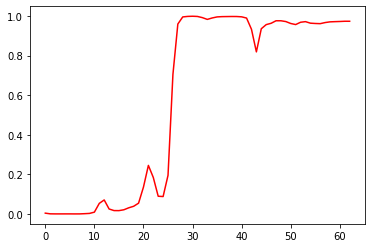

In [ ]:
#plotting element and short-element:
i =  2
#j =  i+2260
p1,_ = gating(i,i, X_test, y_test)
print(return_name(y_test[i], dictionary))
#p2,_ = gating(j, 0, X_test, y_test)
plt.plot(p1, color = 'red')
#plt.plot(p2, color = 'blue')


In [ ]:
#calculate average winner:
#started: 13:23
th = 60
c=0
for i in range(len(X_test)):
    if len(X_test[i]) <= th:
        c+=1
print(c)

1357


In [ ]:
def compute_average_winners():
    average_winner = []
    #started at ~1717

    for i in range(len(X_test)):
        if i %100 ==0:
            print("i = ",i)
        # update the bar
        target = np.argmax(y_test[i])
        current_winner = []
        #per timeframe:
        for j in range(1, len(X_test[i])+1):
            samp = X_test[i]
            samp = samp[:j,:]
            samp = np.expand_dims(samp, axis=0)
            preds = model.predict(samp, verbose=0)
            cos_lijst = cosine_sim_list(preds, y_test[0:2260])
            winner = np.argmax(cos_lijst)
            if winner == i:
                current_winner.append(1)
            else: 
                current_winner.append(0)
        average_winner.append(current_winner)
    return average_winner

def average_winner_percentage(average_winner):
    avg_list = []
    max_time_frame = 105
    #elk tijdsframe door:
    for i in range(max_time_frame):
        tijds_lijst = []
    #hele lijst door:
        for j in range(len(average_winner)):
            if i < len(average_winner[j]):
                tijds_lijst.append(average_winner[j][i])
        avg_list.append(np.sum(tijds_lijst)/len(tijds_lijst))
    print(avg_list)
    return avg_list

#average_winner = compute_average_winners()
#np.save(adres + "average_winner"  + "_full_gates", average_winner)

[0.001327433628318584, 0.001327433628318584, 0.001327433628318584, 0.0022123893805309734, 0.0022123893805309734, 0.002654867256637168, 0.004424778761061947, 0.005309734513274336, 0.00663716814159292, 0.007079646017699115, 0.007964601769911504, 0.01327433628318584, 0.014601769911504425, 0.01902654867256637, 0.021238938053097345, 0.02079646017699115, 0.024336283185840708, 0.02743362831858407, 0.03185840707964602, 0.03716814159292035, 0.03893805309734513, 0.0451527224435591, 0.0491585473870682, 0.05004428697962799, 0.05934455270150576, 0.06557377049180328, 0.07279183311140701, 0.07466666666666667, 0.08763345195729537, 0.09131403118040089, 0.09857270294380018, 0.10120913569189431, 0.1044574515983791, 0.11382113821138211, 0.12227272727272727, 0.13031550068587106, 0.1385956860945388, 0.15223463687150837, 0.1615493623051488, 0.1728748806112703, 0.18124392614188534, 0.18746916625555007, 0.1966800804828974, 0.2089783281733746, 0.21667551779075941, 0.233477789815818, 0.24327354260089687, 0.24651

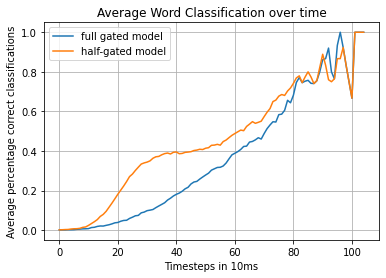

In [ ]:
average_winner = np.load(adres+ "average_winner" + "_full_gates.npy", allow_pickle=True)
avg_2 = np.load(adres+ "average_winner" + "_half_gates.npy", allow_pickle=True)
avg_winner = average_winner_percentage(average_winner)
avg_2 = average_winner_percentage(avg_2)
plt.plot(avg_winner, label = 'full gated model')
plt.plot(avg_2, label = 'half-gated model')

plt.xlabel('Timesteps in 10ms')
plt.ylabel('Average percentage correct classifications')
plt.title('Average Word Classification over time')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def plot_multiple_words(target, fals1, fals2, fals3, fals4, X_train, y_train):
    real,false,false2, false3,false4 = [],[],[],[], []
    lijstje = [real, false, false2, false3, false4]
    list2 = [target, fals1, fals2, fals3, fals4]
    sample = np.expand_dims(X_train[target],axis=0)
    time_steps = np.arange(1,len(X_train[target]),1)
    for i in range(len(lijstje)):
        x,_ = gating(target, list2[i], X_train, y_train)
        print(lijstje[i], np.max(x))
        lijstje[i].append(x)
    plt.plot(real[0], color='black', label= 'target:'+ return_name(y_train[target], dictionary))
    plt.plot(false[0], color = 'red', label = return_name(y_train[fals1], dictionary))
    plt.plot(false2[0], color='blue', label= return_name(y_train[fals2], dictionary))
    plt.plot(false3[0], color= 'green', label= return_name(y_train[fals3], dictionary))
    plt.plot(false4[0], color= 'purple', label= return_name(y_train[fals4], dictionary))
    plt.legend()
    plt.grid(True)
    plt.savefig(save_dir + '/Plot_multiple_words_fullsamples')
    plt.xlabel('Timesteps in milliseconds')
    plt.ylabel('Cosine similarity')
    plt.savefig(save_dir + '/Plot_multiple_words_fullsamples_test')
    plt.tight_layout()
#plot the 5 winners:
def plot_5_winners_end(target, X_train, y_train):
    #create sample: 
    sample = np.expand_dims(X_train[target],axis=0)
    time_steps = np.arange(1,len(X_train[target]),1)
    preds = model.predict(sample, verbose=0)
    winners = []
    print(return_name(y_train[target], dictionary))
    #loop: 
    # for every timestep:
        # calculate 5 winners
            # add them to list
    cos_lijst = cosine_sim_list(preds, y_train[0:2260])
    cos_lijst = list(cos_lijst)
    perc, word, res = max_N(cos_lijst,10, y_train[0:2260]) 
    #fix double words:
    res2 = [] 
    bekende_woorden =[]
    for i in range(len(res)):
        if  return_name(y_train[res[i]], dictionary) not in bekende_woorden:
            res2.append(res[i])
            bekende_woorden.append(return_name(y_train[res[i]], dictionary))
    print(len(res2))
    #done filtering double words:

    winners.append(res2) 
    winners = [item for sublist in winners for item in sublist]
    winners = np.unique(winners)  
    real,false,false2, false3,false4 = [],[],[],[], []
    winner_lijsten = [real, false, false2, false3, false4]
    for i in range(len(winners)):
        x,_ = gating( target, winners[i], X_train, y_train)
        winner_lijsten[i].append(x)
    for i in range(len(winner_lijsten)):
        plt.plot(winner_lijsten[i][0], label = return_name(y_train[winners[i]], dictionary)) 
    plt.legend() 
    plt.xlabel('Timesteps in milliseconds')
    plt.ylabel('Cosine similarity')
    plt.legend()
    plt.grid(True)
    plt.savefig(save_dir + '/Plot_multiple_words_fullsamples_test')
    plt.tight_layout()

bekers
5


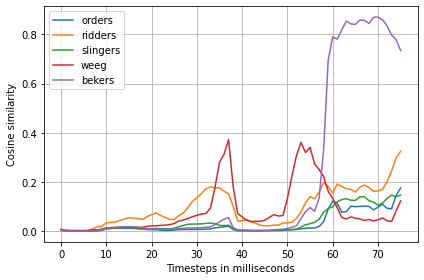

In [ ]:
#plot_multiple_words(1956, 2140, 2149, 1285, 955, X_test, y_test)
plot_5_winners_end(1956, X_test, y_test)

In [ ]:
#average_herkenning_lijst
def herkennings_lijst(treshold):
    correct_pres = 0
    herkenning = []
    for x in range(len(X_test)):
        if x % 100 == 0:
            print("nummer: ", x, "van de : ", len(X_test))
        sample = np.expand_dims(X_test[x], axis=0)
        for i in range(1, len(X_test[x])+1):
            timesample = sample[:, 0:i, :]
            preds = model.predict(timesample, verbose=0)
            predictions = cosine_sim(preds, y_test[x])
            if predictions > treshold:
                herkenning.append(i)
                break
    return herkenning

#Run threshold lijst:#

In [ ]:
treshold = [0.6, 0.7, 0.8, 0.9]
for i in treshold:
    print("full_herkennings_lijst_" + str(treshold))
    herkenning = herkennings_lijst(i)
    np.save(adres + "full_herkennings_lijst_" + str(i) + "_half_gates", herkenning)

full_herkennings_lijst_[0.5, 0.6, 0.7, 0.8, 0.9]
nummer:  0 van de :  2260
nummer:  100 van de :  2260
nummer:  200 van de :  2260
nummer:  300 van de :  2260
nummer:  400 van de :  2260
nummer:  500 van de :  2260
nummer:  600 van de :  2260
nummer:  700 van de :  2260
nummer:  800 van de :  2260
nummer:  900 van de :  2260
nummer:  1000 van de :  2260
nummer:  1100 van de :  2260
nummer:  1200 van de :  2260
nummer:  1300 van de :  2260
nummer:  1400 van de :  2260
nummer:  1500 van de :  2260
nummer:  1600 van de :  2260
nummer:  1700 van de :  2260
nummer:  1800 van de :  2260
nummer:  1900 van de :  2260
nummer:  2000 van de :  2260
nummer:  2100 van de :  2260
nummer:  2200 van de :  2260
full_herkennings_lijst_[0.5, 0.6, 0.7, 0.8, 0.9]
nummer:  0 van de :  2260
nummer:  100 van de :  2260
nummer:  200 van de :  2260
nummer:  300 van de :  2260
nummer:  400 van de :  2260
nummer:  500 van de :  2260
nummer:  600 van de :  2260
nummer:  700 van de :  2260
nummer:  800 van de :  22

KeyboardInterrupt: ignored

gebeden
5
[[809, 202, 609, 687, 110]]


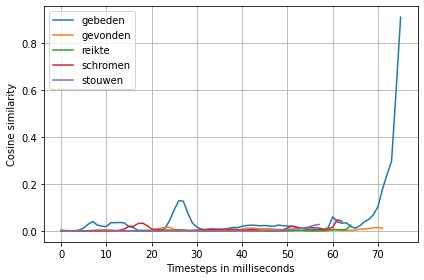

In [ ]:
plot_5_winners_end(110, X_test, y_test)

In [ ]:
#Create testset:
def create_testset(nr_samples):
    X_test = []
    y_test = []
    for i in range(nr_samples):
        random_A = random.randint(0, len(X_train[0:2260])-1)
        random_B = random.randint(0, len(X_train[0:2260])-1)
        X_test.append(np.append(X_train[random_A], X_train[random_B], axis=0))
        y_test.append((y_train[random_A], y_train[random_B]))
    return X_test, y_test

In [ ]:
th = 103
nr = 0
for i in range(len(X_test)):
    if len(X_test[i]) > th:
        nr+=1
print(nr)

1


In [ ]:
#create a second test set
nr_samples = 100
X_test_2, y_test_2 = create_testset(nr_samples)

tubas tel
tel
length of:  tubas 57
length of:  tel 33


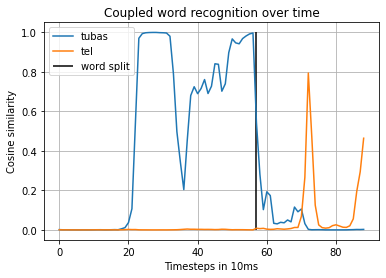

In [ ]:
#predict a sample from the second test set:
i=0
print(return_name(y_test_2[0][0], dictionary),return_name(y_test_2[0][1], dictionary))
print(return_name(y_test_2[0][1], dictionary))
x= return_spot_from_name(return_name(y_test_2[0][0], dictionary), dictionary)
y = return_spot_from_name(return_name(y_test_2[0][1], dictionary), dictionary)

print("length of: ", return_name(y_test_2[0][0], dictionary), len(X_train[x]))
print("length of: ", return_name(y_test_2[0][1], dictionary), len(X_train[y]))

lengte = len(X_test_2[i])
time_steps = range(1,lengte,1)
samp = X_test_2[i]
sampl2 = samp[:lengte,:]
sampl2 = np.expand_dims(samp, axis=0)
predictions = []
preds1 = []
for j in time_steps:
    timesample = sampl2[:, 0:j, :]
    preds = model.predict(timesample, verbose=0)
    predictions.append(cosine_sim(preds, y_test_2[0][0]))
    preds1.append(cosine_sim(preds, y_test_2[0][1]))

plt.plot(predictions, label = return_name(y_test_2[0][0], dictionary))
plt.plot(preds1, label = return_name(y_test_2[0][1], dictionary))
plt.vlines(len(X_train[x]), ymin=0, ymax = 1, color = 'black', label = 'word split')
plt.legend()
plt.xlabel('Timesteps in 10ms')
plt.ylabel('Cosine similarity')
plt.title('Coupled word recognition over time')
plt.grid(True)

In [ ]:
#functions for Entropy calculations:

from scipy.stats import powerlaw
from scipy.stats import entropy

#Apply the power law on the Entropy measure.
def power_law(x, power):
    x = [pow(i, power) for i in x]
    return x

#Return the cosine list for a certain timestep of a sample:
def cos_lijst_op_tijdsstap(i, tijdsstap, y_train, X_train):
    sample = X_train[i][0:tijdsstap][:]
    sample = np.expand_dims(sample, axis=0)
    preds = model.predict(sample, verbose=0)
    cos_lijst = cosine_sim_list(preds, y_train)
    cos_lijst = list(cos_lijst)
    return cos_lijst

#Given the cosine similarity matrix, return the Entropy.
def calculate_Entropy(cos_lijsten):
    # - sum p log p
    entropy = [-p * np.log(p) for p in cos_lijsten]
    entropy = np.sum(entropy)
    return entropy

#given a sample from a set (X_train, y_train), calculate the Entropy of the network over the gated sample.
def Entropy_of_sample(sample, X_train, y_train):
    print("sample name: ", return_name(y_train[sample], dictionary))
    print("lengte: ", len(X_train[sample]))
    lengte = len(X_train[sample])
    power = 3
    cos_lijsten = []
    for tijd in range(1,lengte+1):
        #create cosinus similarity vector
        cos_lijstje = cos_lijst_op_tijdsstap(sample, tijd, y_train, X_train)
        cos_lijstje = [0.0000001 if x <= 0 else x for x in cos_lijstje]
        #use the power law
        cos_lijstje= power_law(cos_lijstje, power)
        som = np.sum(cos_lijstje)
        #divide all elements by the sum over all elements?
        cos_lijstje = [x/som for x in cos_lijstje]
        cos_lijsten.append(cos_lijstje)
    entropy_list = []
    for i in range(lengte):
        entropy = calculate_Entropy(cos_lijsten[i])
        entropy_list.append(entropy)
    return entropy_list

In [ ]:
# quick Entropy examples:

lijstje = []
a = 0.5
for i in range(2259):
    lijstje.append((1-a)/2259)
lijstje.append(a)
print("laatste: ent", calculate_Entropy(lijstje))


laatste: ent 4.554485938793947


In [ ]:
print(len(X_test))

2260


sample name:  hoffelijk
lengte:  73


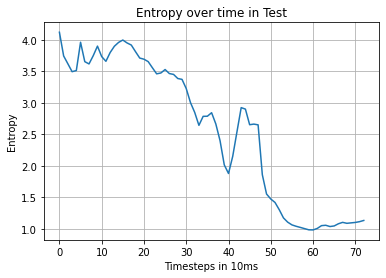

In [ ]:
entropy_list = Entropy_of_sample(190, X_val, y_val)
plt.plot(entropy_list)
plt.xlabel('Timesteps in 10ms')
plt.ylabel('Entropy')
plt.title('Entropy over time in Test')
plt.grid(True)


sample name:  eeltig
lengte:  66


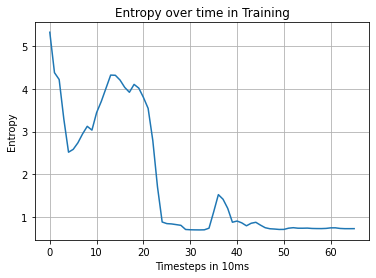

In [ ]:
entropy_list = Entropy_of_sample(0, X_train, y_train)
plt.plot(entropy_list)
plt.xlabel('Timesteps in 10ms')
plt.ylabel('Entropy')
plt.title('Entropy over time in Training')
plt.grid(True)


In [ ]:
print(len(X_val))

200


In [ ]:
# calculate the entropy over all samples:
X_train2 = X_val
y_train2 = y_val
full_entropy_list = []
for i in range(len(X_train2)):
    if i%100 == 0:
        print("number: ", i)
    sample = i
    lengte = len(X_train2[sample])
    power = 3
    cos_lijsten = []
    for tijd in range(1,lengte+1):
        #create cosinus similarity vector
        cos_lijstje = cos_lijst_op_tijdsstap(sample, tijd, y_train2, X_train2)
        #cos_lijstje = [0.0000001 for x in cos_lijstje if x <= 0]
        #use the power law
        cos_lijstje= power_law(cos_lijstje, power)
        som = np.sum(cos_lijstje)
        #divide all elements by the sum over all elements?
        cos_lijstje = [x/som for x in cos_lijstje]
        cos_lijsten.append(cos_lijstje)
    entropy_list = []
    for i in range(lengte):
        entropy = calculate_Entropy(cos_lijsten[i])
        entropy_list.append(entropy)
    full_entropy_list.append(entropy_list)
#save entropy to Drive:
np.save(adres + "full_entropylist_half_gates_small", full_entropy_list)

number:  0
number:  100


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
# Load entropy list from disk:
half_path = os.path.join('/content/gdrive/My Drive/Colab Notebooks/data', 'saved_models/(2500,1)_model_LSTM_12-2_250_half_gates_normalized')
full_entropy_list = np.load(save_dir + "/full_entropylist_full_gates.npy", allow_pickle=True)
half_entropy_list = np.load(half_path + "/full_entropylist_half_gates.npy", allow_pickle=True)

<class 'numpy.ndarray'>
[list([4.770194074220411, 3.8393809360808557, 4.105990187114433, 4.321360882520063, 3.8483787070304576, 3.466230155729177, 3.242687795202165, 3.196843842092064, 3.0823760670194, 2.9423822404360918, 2.784154747039709, 2.7637135219918525, 2.786317070818125, 2.7587792659391326, 2.8271685194496916, 2.6640872599122556, 2.474890909338301, 2.5923785259954006, 2.594305515071121, 2.572456623384787, 2.54073349801352, 2.655228124648068, 2.6497001886060865, 2.6293542291062737, 2.512524059000743, 2.3693759723289602, 2.3119373859405195, 2.3264287313781598, 2.398291910652185, 2.409359614992017, 2.1558981731652924, 2.007398728846458, 1.632907762362417, 1.2821613889887722, 1.3880017934787898, 1.1521819564939793, 0.2392723505035298, 0.12572048144340975])
 list([4.577645226830314, 3.7949175064190217, 3.4710467888279983, 3.28466881209269, 3.0136278233315226, 2.9731431176223326, 3.752054091081786, 3.209827363450655, 3.6808376136826393, 4.192808764452309, 3.629336924946601, 3.0265041

In [ ]:
#Given a dataset, return the mean, lowest and highest confidence interval.
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

#Given the entropy list, create for every timestep the mean,cl,cu values.
def average_entropy_list(full_entropy_list):
    avg_list = []
    max_time_frame = 105
    #lower and upper bound:
    cl = []
    cu= []
    #elk tijdsframe door:
    for i in range(max_time_frame):
        tijds_lijst = []
    #hele lijst door:
        for j in range(len(full_entropy_list)):
            if i < len(full_entropy_list[j]):
                tijds_lijst.append(full_entropy_list[j][i])
        mean, lower, upper = mean_confidence_interval(tijds_lijst)
        avg_list.append(mean)
        cl.append(lower)
        cu.append(upper)
    return avg_list, cl, cu

def fix_entropy_list(avg_list,cl, cu, avg_list_half, cl_half, cu_half):
    avg_list = np.insert(avg_list, 0, 7.723, axis=0)
    cl = np.insert(cl, 0, 7.723, axis=0)
    cu = np.insert(cu, 0, 7.723, axis=0)
    avg_list_half = np.insert(avg_list_half, 0, 7.723, axis=0)
    cl_half = np.insert(cl_half, 0, 7.723, axis=0)
    cu_half = np.insert(cu_half, 0, 7.723, axis=0)
    return avg_list,cl, cu, avg_list_half, cl_half, cu_half

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


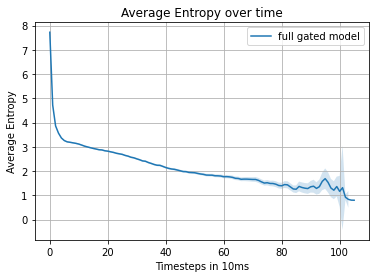

In [ ]:
#Plot the mean,cu,cl values:
fig, ax = plt.subplots()
avg_list,cl, cu = average_entropy_list(full_entropy_list)
avg_list_half, cl_half, cu_half = average_entropy_list(half_entropy_list)
avg_list,cl, cu, avg_list_half, cl_half, cu_half = fix_entropy_list(avg_list,cl, cu, avg_list_half, cl_half, cu_half)

ax.plot(avg_list, label = 'full gated model')
ax.fill_between(range(len(avg_list)), cu, cl, alpha=.2)

#ax.plot(avg_list_half, label = 'Gated model')
#ax.fill_between(range(len(avg_list)), cu_half, cl_half, alpha=.2)
plt.xlabel('Timesteps in 10ms')
plt.ylabel('Average Entropy')
plt.title('Average Entropy over time')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
for i in range(len(X_test)):
    if len(X_test[i]) > 99:
        print(return_name(y_test[i], dictionary))
        print("lengte = ", len(X_test[i]))

cijfers
lengte =  103
gedaagd
lengte =  105
gestormd
lengte =  100
surrogaat
lengte =  103


In [ ]:
half_herkennings_list = []
full_herkennings_list = []
lijstje = [0.5, 0.6, 0.7, 0.8, 0.9]
for i in lijstje:
    x = np.load(save_dir + "/full_herkennings_lijst_" + str(i) + "_half_gates.npy", allow_pickle=True)
    half_herkennings_list.append(x)
    y = np.load(full_path + "/full_herkennings_lijst_" + str(i) + "_full_gates.npy", allow_pickle=True)
    full_herkennings_list.append(y)
    print(len(x), len(y))


2260 2238
2260 2217
2259 2164
2255 2006
2226 1544
[30 53 46 ... 62 68 59]


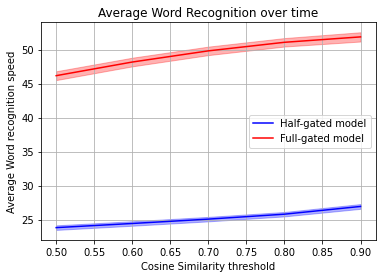

In [ ]:
avg_list, cl, cu = [0]*5, [0]*5, [0]*5
avg_list_full, cl_full, cu_full = [0]*5, [0]*5, [0]*5
for i in range(len(full_herkennings_list)):
    avg_list[i],cl[i], cu[i] = mean_confidence_interval(half_herkennings_list[i], confidence=0.95)
    avg_list_full[i] ,cl_full[i], cu_full[i] = mean_confidence_interval(full_herkennings_list[i], confidence=0.95)

#some example data

fig, ax = plt.subplots()
ax.plot([0.5,0.6,0.7,0.8,0.9], avg_list, color = 'blue', label ='Half-gated model')
ax.fill_between([0.5,0.6,0.7,0.8,0.9], cl, cu, color='b', alpha=.3)
#second plot:
ax.plot([0.5,0.6,0.7,0.8,0.9], avg_list_full, color = 'red', label = 'Full-gated model')
ax.fill_between([0.5,0.6,0.7,0.8,0.9], cl_full, cu_full, color='r', alpha=.3)

plt.xlabel('Cosine Similarity threshold')
plt.ylabel('Average Word recognition speed')
plt.title('Average Word Recognition over time')
plt.grid(True)
plt.legend()
plt.show()